## **Logistic Regression**

Uses the logistic function as a link between the regular regression and the classification problem where $y = {0,1}$.

#### **Logistic Function**

In [4]:
import numpy as np

## sigmoid or logistic function
def logistic(x):
  return np.exp(x) / (1 + np.exp(x))

## this function is easier to calculate b/c it only the exponential once
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
## x = 2
print(logistic(2))
print(sigmoid(2))

0.8807970779778824
0.8807970779778823


In [7]:
## x = -2.7
print(logistic(-2.7))
print(sigmoid(-2.7))

0.06297335605699649
0.06297335605699649


In [9]:
## x = 924
print(logistic(924))
print(sigmoid(924)) ## for large values, the sigmoid becomes 1

nan
1.0


<ipython-input-4-33c5bf42a8c3>:5: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
<ipython-input-4-33c5bf42a8c3>:5: RuntimeWarning: invalid value encountered in scalar divide
  return np.exp(x) / (1 + np.exp(x))


In [10]:
## x = -924
print(logistic(-924))
print(sigmoid(-924)) ## for large negative values, the sigmoid becomes 0

0.0
0.0


<ipython-input-4-33c5bf42a8c3>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#### **Example**

In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/default.csv')[['balance', 'default']]
df.head()

,balance,default
0,729.526495,0
1,817.180407,0
2,1073.549164,0
3,529.250605,0
4,785.655883,0


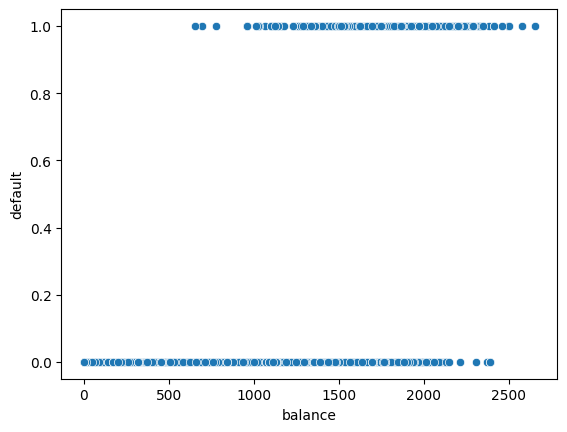

In [12]:
## scatter plot
import seaborn as sns
sns.scatterplot(data=df, x='balance', y='default');

In [13]:
## sklearn - predictive models (do not include p-values)
## statsmodels.api - descriptive (includes p-values, includes GOODNESS OF FIT)

## Create X and y
X = df.drop('default', axis = 1)
y = df['default']

In [15]:
## model (descriptive)
import statsmodels.api as sm

## instance (require y and X)
## sm.add_constant adds the intercept column (1s) to matrix X
## you need this column when estimating a y-intercept
## recommended make instance and fit at the same time
lr = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [17]:
## the summary print p-values and goodness of fit metrics
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.4534
Time:                        19:07:49   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

In [18]:
## param estimates: (k + 1)
## error df: n - (k+1) = 10000 - 2 = 9998

In [26]:
## say that we have a balance past due of $2000, what is the probability of default?
log_odds = -10.6513 + 0.0055*2000
print(f'This is the Log(Odds) of Default {log_odds}')

phat = np.exp(log_odds) / (1 + np.exp(log_odds))  ## formula 1
print(f'This is the Probability of Default {phat}')

This is the Log(Odds) of Default 0.3486999999999991
This is the Probability of Default 0.5863022968465422


In [27]:
## say that we have a balance past due of $10000
log_odds = -10.6513 + 0.0055*10000
print(f'This is the Log(Odds) of Default {log_odds}')

phat = np.exp(log_odds) / (1 + np.exp(log_odds))  ## formula 1
print(f'This is the Probability of Default {phat}')

This is the Log(Odds) of Default 44.3487
This is the Probability of Default 1.0


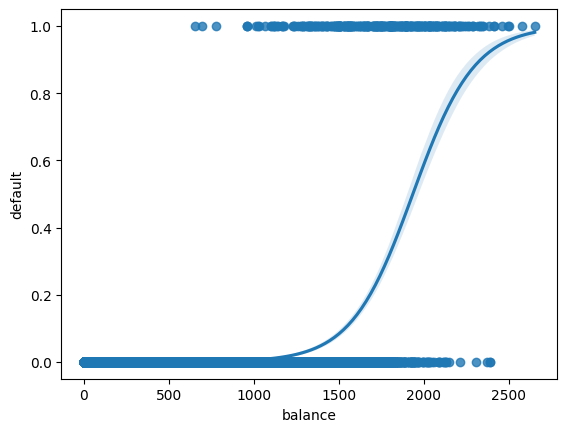

In [28]:
## plot the logistic model
sns.regplot(data=df, x='balance', y='default', logistic=True, ci = None);

In [29]:
## say that we have a balance past due of $2500, what is the probability of default?
log_odds = -10.6513 + 0.0055*2500
print(f'This is the Log(Odds) of Default {log_odds}')

phat = np.exp(log_odds) / (1 + np.exp(log_odds))  ## formula 1
print(f'This is the Probability of Default {phat}')

This is the Log(Odds) of Default 3.098699999999999
This is the Probability of Default 0.9568390894718011


In [30]:
## odds
## the odds of default = p(default) / p(non-default)
## odds of default = 2   (2 to 1 odds of default, p(default) is 2 times greater than p(non-default))
## balance = 2500
## what are the odds of default?
log_odds = -10.6513 + 0.0055*2500

phat = np.exp(log_odds) / (1 + np.exp(log_odds))  ## formula 1

odds = phat / (1 - phat)
print(f'This is the Odds of Default {odds}')

This is the Odds of Default 22.169112693919093


In [31]:
## this person has a 22 to 1 odds of default
## p(default) is about 22 times larger p(non-default)

In [33]:
## If a person has a 22 to 1 odds of default
## what is the log(odds)
np.log(22)

3.091042453358316

In [34]:
## If a person has a 0.35 log(odds) of default, what are the odds of default?
np.exp(0.35)

1.4190675485932571